# Keyword Recency Score Competition - Exploratory Data Analysis

*Notebook created by Erick Calderin*

**Web site:** https://www.datasource.ai/es/home/data-science-competitions-for-startups/predecir-el-puntaje-de-recencia-en-papers-de-investigacion

## Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [3]:
train = pd.read_csv('../data/raw/Train.csv')
test = pd.read_csv('../data/raw/FinalTest.csv')

## Exploring

### First exploration

In [4]:
train.head()

,id,Language,Year,Abstract,Title,total_rel_score
0,1,en,2016,The present study investigates an inventory mo...,Replenishment policy for non-instantaneous det...,0.630682
1,2,en,2019,AIM: To investigate the clinical characteristi...,Analysis of soldiers' orbital wall fracture su...,0.583333
2,3,en,2019,"Aflatoxin M1 (AFM1) and ochratoxin A (OTA), wh...","Modulation of Mucin (MUC2, MUC5AC and MUC5B) m...",0.372222
3,4,en,2017,Background/Aim: There are still unrevealed tre...,Traditional dentistry knowledge among Serbs in...,0.661765
4,5,en,2015,Impairment in empathy has been demonstrated in...,Dimensional schizotypy and social cognition: A...,0.373737


In [5]:
test.head()

,id,Language,Year,Abstract,Title
0,1,en,2017,Sarcoidosis is occasionally accompanied by hem...,Sarcoidosis-Lymphoma Syndrome Associated with ...
1,2,en,2015,The increase of the supply chains efficiency r...,Analysis Of The Logistics Intermediaries Choic...
2,3,pt,2018,Resumo A fiscalização de contratos na adminis...,Fiscalização de contratos de serviços terceiri...
3,4,en,1999,Este artigo propõe uma abordagem original para...,Emprego do método de análise hierárquica (AHP)...
4,5,en,2013,A research was conducted to increase the virul...,PENAMBAHAN BEBERAPA JENIS BAHAN NUTRISI PADA M...


In [6]:
print('Train Shape', train.shape)
print('Test Shape', test.shape)

Train Shape (21456, 6)
Test Shape (10728, 5)


In [7]:
def print_years_languages(dataframe, title='Train'):
    print(f'Unique languages in {title} Dataset')
    print(dataframe.Language.value_counts())
    print('---')
    print(f'Amount Unique Years in {title} Dataset')
    print(len(dataframe.Year.value_counts()))

In [8]:
print_years_languages(train)

Unique languages in Train Dataset
en    18539
pt     1539
es     1378
Name: Language, dtype: int64
---
Amount Unique Years in Train Dataset
59


In [9]:
print_years_languages(test, 'Test')

Unique languages in Test Dataset
en    9227
pt     821
es     680
Name: Language, dtype: int64
---
Amount Unique Years in Test Dataset
49


### Missing values

No missing values!

In [10]:
train.isna().sum()

id                 0
Language           0
Year               0
Abstract           0
Title              0
total_rel_score    0
dtype: int64

In [11]:
test.isna().sum()

id          0
Language    0
Year        0
Abstract    0
Title       0
dtype: int64

### Score distribution for each language

In [12]:
def score_distribution(dataframe, title='Train'):
    sns.displot(data=train, x= 'total_rel_score', aspect=1.4, hue='Language')
    plt.title(f'Histogram of score by language in {title}', fontsize=15, pad=20)
    plt.xlabel('Scores')

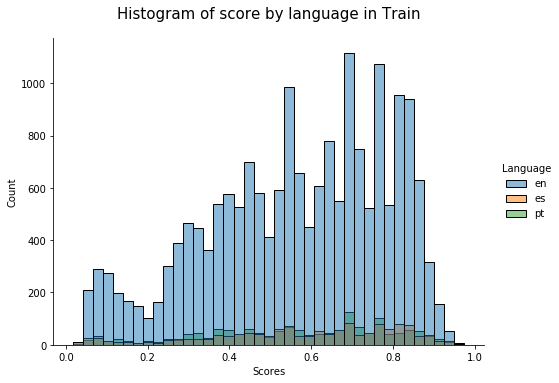

In [13]:
score_distribution(train)

Plot above indicate us there is no outliers within data, another great new! However we can notice that papers at english language overcome to ones created in other languages.

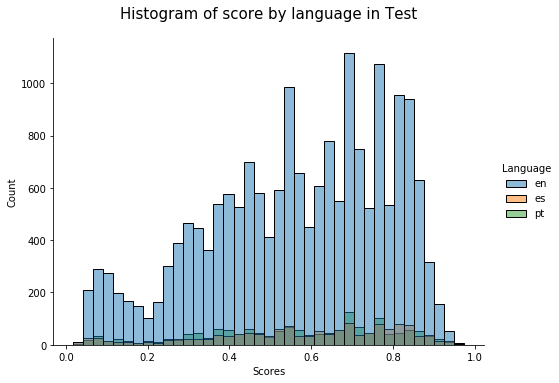

In [14]:
score_distribution(test, title='Test')

It is good to know that both train and test have same data distribution. It means that there is consistence and the model that will be trained will work well with unknown dada.

### Full plot

Train

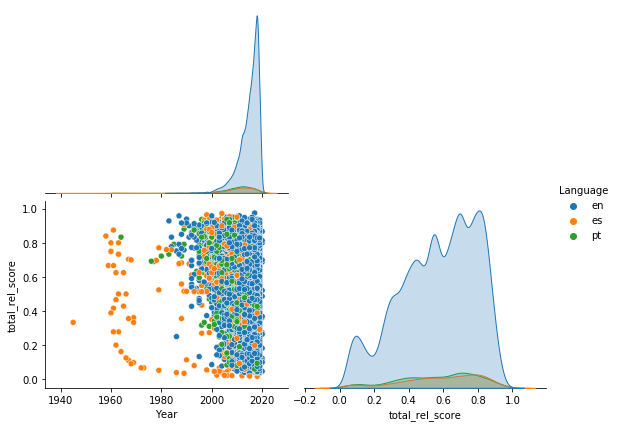

In [15]:
sns.pairplot(train.drop(columns=['id']), hue='Language', corner=True, aspect=1.3, height=3)

In another hand, there is a clear separation between papers at spanish language in early years and rest of papers.